# Chapter 09 -- Panda Time Series and Date Handling--DRAFT

## Topics Covered:

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling"> Creating and manipulating a fixed-frequency of datetime spans </a>

Convert time series from one frequency to another

Increment 'non-standard' datetimes intervals (e.g. business week)

Time Series Walk-Through

Chapter 8, <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2008%20--%20Python%20Date%2C%20Time%2C%20and%20%20Timedelta%20Objects.ipynb"> Understanding Date Time and TimeDelta objects </a> provided a short introduction to Python's built-in datetime capabilities.  In this chapter we illustrate pandas time series and date handling.  



In [34]:
from datetime import date, time, datetime, timedelta
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Creating and manipulating a fixed-frequency of date and time spans

The pd.date_range() method generates a DateTime Index which is applied to a panda Series or DataFrame to provide datetime interval indexing.  We will see examples of its construction methods.  And later we will utilize indexers taking advange of the Date TimeIndex.  

In [35]:
rng = pd.date_range('1/1/2016', periods=90, freq='D')

Print the first 10 dates in the DateTimeIndex

In [36]:
rng[:10]

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [37]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [38]:
type(ts)

pandas.core.series.Series

In [39]:
pd.Period('2016-05', freq='D')

Period('2016-05-01', 'D')

Timestamp and Period can be an index.  Coerced into PeriodIndex and DateTimeIndex

In [40]:
dates = [pd.Timestamp('2012-05-01'), pd.Timestamp('2012-05-02'), pd.Timestamp('2012-05-03')]

In [41]:
dates

[Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-05-02 00:00:00'),
 Timestamp('2012-05-03 00:00:00')]

In [42]:
 ts = pd.Series(np.random.randn(3), dates)

In [43]:
ts

2012-05-01   -0.953297
2012-05-02   -0.008937
2012-05-03   -1.084139
dtype: float64

In [44]:
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [45]:
ts.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

You can assemble a DataFrame by using strings and integers for columns.

In [46]:
df = pd.DataFrame({'year': [2014, 2015, 2016],
                   'month': [1, 2, 3],
                   'day': [1,2,3,]})
df1 = pd.to_datetime(df)

In [47]:
from datetime import datetime, date, time
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
rng = pd.date_range(start,end)

In [48]:
rng

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [49]:
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
b_rng = pd.bdate_range(start,end)

In [50]:
b_rng

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=261, freq='B')

In [51]:
rng = pd.date_range(start, end, freq='BM')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.index

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30'],
              dtype='datetime64[ns]', freq='BM')

Returns the first 5

In [52]:
ts[:5].index

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31'],
              dtype='datetime64[ns]', freq='BM')

 Returns the nth, i.e. 2 = every other one

In [53]:
ts[::2]

2016-01-29    0.430344
2016-03-31    1.179259
2016-05-31   -0.561654
2016-07-29    1.243785
2016-09-30   -2.040529
2016-11-30    0.354481
Freq: 2BM, dtype: float64

In [54]:
ts[::6]

2016-01-29    0.430344
2016-07-29    1.243785
Freq: 6BM, dtype: float64

## Time Series Walk-Through

We can begin combining features covered in previous chapters to conduct a walk-through of an actual time-series analysis.  

#### The Data

The data is the FHFA House Price Index (HPI) which is a broad measure of the movement of single-family house prices. It is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac.  

Details about the data and how it is organized can be found <a href="https://catalog.data.gov/dataset/fhfa-house-price-indexes-hpis"> here </a>. This time series begins January 1991 and end August 2016.  Both the seasonally adjusted index 'index_sa' and the non-seaonally adjusted index 'index_nsa' set the index value at 100 for January 1991.  

#### The Inquiry

The three salient questions to be answered are:

    1. Have U.S. aggregate home prices recovered their value since the Great Recession of 2008-2010?
    2. Where are the highest and lowest home values in the U.S. today?
    3. How do the highest and lowest home values market segments compare to the aggregate U.S. home prices?
    
#### The Approach

The input .csv file located <a href="some_URL"> here </a>.  

The file is composed of two parts.  Part 1, rows 2 to 3081 are records for the aggregate market groups at the Census Division level.  The frequency interval is monthly.  

This portion of the file has 10 columns containing values for major market segments and the U.S. aggregate prices.  The price indicies are both seasonally adjusted and non-seasonally adjusted values.  The end-result DataFrame will be called 'df_us'.

Part 2, rows 3082 to 96,243 are more granular with a quarterly frequency interval. The major U.S. market segments are broken into smaller geographics areas with just the non-seasonaly adjusted home index value. Accordingly, the 10th column 'index_sa' contains no values at this location to the end of the file. The end-result DataFrame will be called 'df_states'.


#### Part 1 of .csv File to Construct the 'df_us' DataFrame

Start with a test read of the entire .csv file.  The pd.read_csv method has the one required arguement, the input file name to create the DataFrame 'df_all'.

In [55]:
df_all = pd.read_csv("C:\Data\\HPI_master.csv")

Check the first 5 rows to determine if the read_csv() method is giving the expected results.

In [56]:
df_all.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.79,101.10
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.44,101.50


We need to combine the year and period fields into a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2008%20--%20Date%2C%20Time%2C%20and%20%20Timedelta%20Objects.ipynb#String-Literal-Mapped-to-datetime-timestamp"> datetime timetamp </a>.  The .csv file in the cell above is read without any datetime parsing for the fields, 'yr' and 'period'.  We could post-process these fields to construct the appropriate date timestamp values.  

A better approach is below.  The parse_dates= argument allows a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#dictionary"> dictionary </a> object with the key being the arbitrary name of the new column created and the key values indicating which fields are to be read in the .csv file.  Recall that Python indexes have a start position of 0.  In the .csv file, these fields are the 7th and 8th column position.

Sometimes, you may need to create your own date-parser, analogous to building a user-defined SAS INFORMAT to map field values into a datetime object.  This is particularly true in cases where the date value is stored as component values in multiple fields.   

The nrows= argument value is set to 3080.  

In [57]:
df_us = pd.read_csv("C:\Data\\HPI_master.csv",
                 parse_dates={'date_idx': [6,7]},
                 nrows=3080)

In [58]:
df_us.shape

(3080, 9)

Validate column names and their data types.

In [59]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 9 columns):
date_idx      3080 non-null datetime64[ns]
hpi_type      3080 non-null object
hpi_flavor    3080 non-null object
frequency     3080 non-null object
level         3080 non-null object
place_name    3080 non-null object
place_id      3080 non-null object
index_nsa     3080 non-null float64
index_sa      3080 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 216.6+ KB


Check for missing values.

In [60]:
df_us.isnull().any()

date_idx      False
hpi_type      False
hpi_flavor    False
frequency     False
level         False
place_name    False
place_id      False
index_nsa     False
index_sa      False
dtype: bool

Set the 'date_idx' column as the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Setting-and-resetting-Indicies">index</a> on the DataFrame.

In [61]:
df_us.set_index("date_idx", inplace=True, drop=False)

Indexing on the datetime column 'date' creates a 'datetime-aware' DateTimeIndex.  

In [62]:
df_us.index

DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01'],
              dtype='datetime64[ns]', name='date_idx', length=3080, freq=None)

Get the earlies and lastest date values in the 'df_us' DataFrame.

In [63]:
print('Earliest date is:', df_us.date_idx.min())
print('Latest date is:', df_us.date_idx.max())

Earliest date is: 1991-01-01 00:00:00
Latest date is: 2016-08-01 00:00:00


We see from list of columns returned from the .info() attribute above we have several categorical columns.  So we need to understand their levels.  Earlier, we saw the .describe() method used for numerical columns.  In the example below, by specifying the 'include=' argument returns a description of string columns.  

Recall that dtype 'O' (not zero) indiactes string values for a Series or DataFrame column.

In [64]:
df_us.describe(include=['O'])

,hpi_type,hpi_flavor,frequency,level,place_name,place_id
count,3080,3080,3080,3080,3080,3080
unique,1,1,1,1,10,10
top,traditional,purchase-only,monthly,USA or Census Division,Mountain Division,DV_WNC
freq,3080,3080,3080,3080,308,308


The 'place_name' column has 10 unique levels or values.  We can examine these values with the .unique() attribute.

In [65]:
df_us.place_name.unique()

array(['East North Central Division', 'East South Central Division',
       'Middle Atlantic Division', 'Mountain Division',
       'New England Division', 'Pacific Division',
       'South Atlantic Division', 'West North Central Division',
       'West South Central Division', 'United States'], dtype=object)

By setting an <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Setting-and-resetting-Indicies"> index </a> on the column 'place_name', replace the 'df_us' DataFrame with rows for 'place_name' equal to 'United States'.  The .loc indexer allows row slicing which is covered in detail <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#.loc-Indexer">here</a>.

Also notice how the .loc indexer slicing the column 'place_names' for 'United States' assigns the subset of rows to the 'df_us' DataFrame.  In other words, the original 'df_us' DataFrame read above containing 3,080 rows now contains 308 rows.  The replacement of the DataFrame by this operation is slient.  The .shape attribute returns the row and column count.

In [67]:
df_us.set_index('place_name', inplace=True, drop=False)
df_us = df_us.loc['United States']

In [68]:
df_us.shape

(308, 9)

Time series data lends itself well to plotting.  Here we use the bokeh package to plot the non-seasonal home price index for the entire U.S. using the 'df_us' DataFrame created above

In [69]:
import bokeh.charts
import bokeh.charts.utils
import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting

# Display graphics in this notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [70]:
p = bokeh.charts.Line(df_us, x='date_idx', y='index_nsa', color='firebrick', 
                      title="Monthly Aggregate Home Price Values in the U.S.")

# Display it
bokeh.io.show(p)

Create the DataFrame 'df_us_3' to select the rows with the values indicated below.

In [75]:
df_us_3 = df_us.loc[['West South Central Division', 'United States', 'Pacific Division']]

Plot the 3 regions using the U.S. home price index for comparison.

In [76]:
p = bokeh.charts.Line(df_us_3, x='date_idx', y='index_nsa', color='place_name', 
                      title="Monthly Home Price in West South Central and Pacific Division compared to U.S.",
                      legend="top_left")

bokeh.io.show(p)

During the Great Recession of 2008-2010, home prices across the U.S. declined dramatically.  Home prices in the Pacific region, which includes California, grew significantly more than the U.S. as a whole.  Aggregate U.S. home prices have regained all of their price losses since then and the Pacific and West South Central regions are not too far behind. 

#### Part 2 of .csv File to Construct the 'df_states' DataFrame

To continue this analysis, we need to read the remainder of the .csv containing state-level data.  In this instance, we use to 'skiprows=' argument to begin reading at row 3082.  We use a list to specify the columns labels. 

Beginning with row 3082 the values for the field 'index_sa' are missing.  We read starting at row 3082 until end of file.  And since the default is to key off the column names, we supply the column mappings by supplying a<a href= "http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#tuple"> tuple</a> of names.  The usecols= argument uses a tuple of integers to indicate which fields are to be read from the .csv file.  Header=None is to prevent the reader from building column names at row position nrows-1, which in our case contains data values.

In [161]:
df_states = pd.read_csv("C:\Data\\HPI_master.csv",
            parse_dates={'date_idx': [6,7]},
            skiprows=3082,
            usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8),
            names=('hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'yr', 'period', 'index_nsa'),
            header=None)

Validate the read.

In [157]:
df_states.shape

(96244, 8)

The following SAS Data Step reads the same .csv file using FIRSTOBS= to begin reading from the arbitary row position 3082.

````
    data df_states;
          infile 'C:\Data\HPI_master.csv' delimiter=',' missover dsd firstobs=3082; 
          informat hpi_type $12.
                   hpi_flavor $16.
                   frequency $9.
                   level $28.
                   place_name $33.
                   place_id $8.
                   yr $5.
                   period $6.
                   index_nsa 8.;
             input hpi_type $
                   hpi_flavor $
                   frequency $
                   level $
                   place_name $
                   place_id $
                   yr $
                   period $
                   index_nsa ;
````

Inspect the first 5 rows.

In [80]:
df_states.head()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
0,1986-04-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,94.95
1,1987-01-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.91
2,1987-02-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.76
3,1987-03-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,94.02
4,1987-04-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,91.43


Display the first 5 rows of the SAS data set df_states.  In the SAS code example below the 'yr' and 'period' variables are combined to create the SAS datetime variable 'date_idx'.

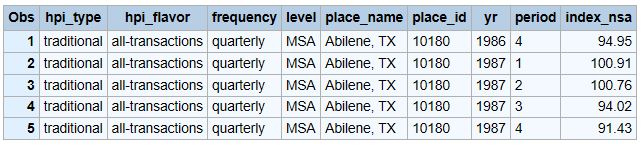

In [81]:
Image(filename='Anaconda3\\output\\df_states_output.JPG')  

Inspect values for the categorical columns.

In [90]:
df_states.describe(include=['O'])

,hpi_type,hpi_flavor,frequency,level,place_name,place_id
count,96244,96244,96244,96244,96244,96244
unique,4,3,1,4,464,464
top,traditional,all-transactions,quarterly,MSA,"Los Angeles-Long Beach-Glendale, CA (MSAD)",31084
freq,90806,67190,96244,69460,472,472


Get unique values for column 'level'

In [82]:
df_states.level.unique()

array(['MSA', 'State', 'USA or Census Division', 'Puerto Rico'], dtype=object)

PROC SQL used to obtain unique values from the variable 'level'.

````
    56       proc sql;
    57          select unique level
    58          from df_states;
    59       quit;
````

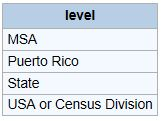

In [83]:
Image(filename='Anaconda3\\output\\level_unique_values.JPG')  

If we had a long list of columns needing to determine unique values the approach above becomes tedious, so an iterative approach is called for using a for loop shown below.

Start by creating a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#list">list</a> called 'lvls' using the .select_dtypes() attribute to include those columns with dtype value 'O' selecting columns with string values.

In [150]:
lvls = list(df_states.select_dtypes(include=['O']).columns)

Inspect the list 'lvls'.

In [93]:
lvls 

['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id']

Use a for loop to get the first 4 items from the 'lvls' list.  The last 2 items have 464 unique levels so use a different approach to process them.

In [94]:
for item in lvls[:4]:
   print(item, 'levels are:', df_states[item].unique())    

hpi_type levels are: ['traditional' 'non-metro' 'distress-free' 'developmental']
hpi_flavor levels are: ['all-transactions' 'expanded-data' 'purchase-only']
frequency levels are: ['quarterly']
level levels are: ['MSA' 'State' 'USA or Census Division' 'Puerto Rico']


Using the levels for the categorial columns displayed above, filter the 'df_state' DataFrame to match the 'df_us' Dataframe.

In [163]:
mask = (df_states['date_idx'] >= '2016-01-01') & (df_states['date_idx'] <= '2016-12-31')

In [165]:
mask = (df_states['hpi_type'] == 'traditional') & (df_states['hpi_flavor'] == 'purchase-only')

In [167]:
df_states.loc[mask].tail()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
90801,2015-02-01,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,221.73
90802,2015-03-01,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,224.54
90803,2015-04-01,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,224.86
90804,2016-01-01,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,226.70
90805,2016-02-01,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,234.14


#### Minimums and Maximums for Part 2, 'df_states' DataFrame

Set an index on the 'index_nsa' values and find the maximum and minimum for all rows in the 'df_states' DataFrame.

In [168]:
df_states.set_index('index_nsa', inplace=True, drop=False)

In [169]:
print('Max value for index_nsa:', df_states['index_nsa'].max())
print('Min value for index_nsa:', df_states['index_nsa'].min())

Max value for index_nsa: 791.71
Min value for index_nsa: 18.31


PROC SQL for finding min and max.

````
    85       proc sql;
    86          select max (index_nsa) as max_index_nsa,
    87                 min (index_nsa) as min_index_nsa
    88          from df_states;
    89       quit;
````

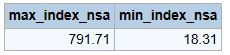

In [172]:
Image(filename='Anaconda3\\output\\max_min_index_nsa.JPG')

The SAS Data Step above used to the read .csv file does not create a SAS datetime variable.  This is illustrated below. 

The SAS example below uses a pair of PUT functions nested inside the YYQ function to create the SAS date variable 'date_idx'.  The PUT functions map the variables 'yr' and 'period' from character to numeric.  The YYQ function described <a href="http://support.sas.com/documentation/cdl/en/lrdict/64316/HTML/default/viewer.htm#a000199346.htm">here</a> returns a SAS datetime values from year and quarter values.

The Data Step below is continued from the SAS Data Step example above used to read the .csv file.

````
    60      date_idx=yyq(put(yr,8.),put(period,8.));
    61      format date_idx yyq10.;
    62      
    63      proc sql;
    64         select max (index_nsa) as max_index_nsa,
    65                min (index_nsa) as min_index_nsa
    66         from df_states
    67         where date_idx between '01Jan2016'd and '31Dec2016'd;
    68      quit;
````

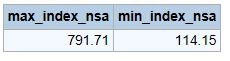

In [89]:
Image(filename='Anaconda3\\output\\2016_min_max.JPG')  

#### Filter for  2016

In [148]:
print("2016 minimum value for 'index_nsa':", df_2016.index_nsa.min())
print("2016 maximum value for 'index_nsa':", df_2016.index_nsa.max())

2016 minimum value for 'index_nsa': 114.15
2016 maximum value for 'index_nsa': 791.71


For 2016, return the largest and smallest value for 'index_nsa' which represents the non-seasonal adjusted home price index.  For this row slicing operation, create a boolean mask and combine it with the .loc indexer described <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators">here</a>.

In order to find the row with the lowest 'index_nsa' value, below uses a three step process:
    1. Create a boolean mask filtering the rows with 'date_idx' between January 1, 2016 and December 31, 2016
    2. Use the .loc indexer applying the mask to create the 'df_2016' DataFrame
    3. Use the .idxmin() attribute to return the row having the minimum 'index_nsa' value

In [147]:
mask = (df_states['date_idx'] >= '2016-01-01') & (df_states['date_idx'] <= '2016-12-31')

In [145]:
df_2016 = df_states.loc[mask]

The .idxmin() method returns multiple 'minimum' values for 'index_nsa' since the index column 'place_name' is not unique.

In [149]:
df_2016.ix[df_2016['index_nsa'].idxmin()]

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
place_name,,,,,,,,
"Detroit-Dearborn-Livonia, MI (MSAD)",2016-01-01,traditional,all-transactions,quarterly,MSA,"Detroit-Dearborn-Livonia, MI (MSAD)",19804,150.04
"Detroit-Dearborn-Livonia, MI (MSAD)",2016-02-01,traditional,all-transactions,quarterly,MSA,"Detroit-Dearborn-Livonia, MI (MSAD)",19804,152.69
"Detroit-Dearborn-Livonia, MI (MSAD)",2016-01-01,traditional,expanded-data,quarterly,MSA,"Detroit-Dearborn-Livonia, MI (MSAD)",19804,114.15
"Detroit-Dearborn-Livonia, MI (MSAD)",2016-02-01,traditional,expanded-data,quarterly,MSA,"Detroit-Dearborn-Livonia, MI (MSAD)",19804,120.96
"Detroit-Dearborn-Livonia, MI (MSAD)",2016-01-01,traditional,purchase-only,quarterly,MSA,"Detroit-Dearborn-Livonia, MI (MSAD)",19804,176.24
"Detroit-Dearborn-Livonia, MI (MSAD)",2016-02-01,traditional,purchase-only,quarterly,MSA,"Detroit-Dearborn-Livonia, MI (MSAD)",19804,183.22


## Convert time series from one frequency to another

In order to subset rows by 'place_name', create an <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Setting-and-resetting-Indicies">index.

In [95]:
df_states.set_index('place_name', inplace=True, drop=False)

The section <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators">Mixing .loc Indexer with Boolean Operators</a> discusses filtering by rows.  However, those examples used complete string values.  In this case, we need a partial string slicing approach. 

The .str.contains() attribute is chained to the indexed selection for the column 'place_name'.  The argument value is the search string.

In [96]:
df_states[df_states['place_name'].str.contains("Washington")].head()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
place_name,,,,,,,,
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1975-03-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.33
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1975-04-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.05
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-01-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,31.02
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-02-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,32.27
"Washington-Arlington-Alexandria, DC-VA-MD-WV (MSAD)",1976-03-01,traditional,all-transactions,quarterly,MSA,"Washington-Arlington-Alexandria, DC-VA-MD-WV (...",47894,33.35


 <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators">Boolean operators</a> can be used to slice by multiple levels of criteria.

In [97]:
df_wash = df_states[(df_states['place_name'].str.contains("Washington")) & \
                    (df_states.hpi_type == 'traditional') & (df_states.level == 'MSA') & \
                    (df_states.hpi_flavor == 'all-transactions')]

In [98]:
df_wash.shape

(164, 8)

In [99]:
p = bokeh.charts.Line(df_wash, x='date_idx', y='index_nsa', color='firebrick',  title= \
   "Quarterly Home Price Values in the Washington Metro Area")

# Display it
bokeh.io.show(p)

Set the df_us DataFrame index to the column 'date_idx' using the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Setting-and-resetting-Indicies"> set_index() method </a>.

In [ ]:
df_us.set_index('date_idx', inplace=True, drop=False)

In [ ]:
df_us_qtr = df_us.resample('Q-DEC').mean()

In [ ]:
df_us_qtr.info()

In [ ]:
p = bokeh.charts.Line(df_us_qtr, x='date', y='index_nsa', color='firebrick',  title="Quarterly Home Price Values in the U.S.")

# Display it
bokeh.io.show(p)

In [ ]:
df_states.head()

Create the new DataFrame 'df_wash' to include row slices where the attribute .str.contains() value is "Washington" and the value "traditional" is in the column 'hpi_type'.

In [ ]:
df_states.sort_values('place_name')


In [ ]:
df_states.columns

In [ ]:
la = df_states.loc['Los Angeles-Long Beach-Glendale, CA (MSAD)']

In [ ]:
la

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    